In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data09/funda_train.csv')

In [3]:
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [4]:
df.store_id = df.store_id.astype(np.int32)
df.card_id = df.card_id.astype(np.int32)
df.card_company = df.card_company.astype('category')
df.transacted_date = pd.to_datetime(df.transacted_date + " " + df.transacted_time, format='%Y-%m-%d %H:%M')
df.installment_term = df.installment_term.astype(np.int16)
df.region = df.region.astype('category')
df.type_of_business = df.type_of_business.astype('category')

del df['transacted_time']

In [5]:
df.head()

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01 13:13:00,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01 18:12:00,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01 18:52:00,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01 20:22:00,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02 11:06:00,0,NaN,기타 미용업,2000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 8 columns):
store_id            int32
card_id             int32
card_company        category
transacted_date     datetime64[ns]
installment_term    int16
region              category
type_of_business    category
amount              float64
dtypes: category(3), datetime64[ns](1), float64(1), int16(1), int32(2)
memory usage: 193.9 MB


In [7]:
df.store_id.value_counts().hist()

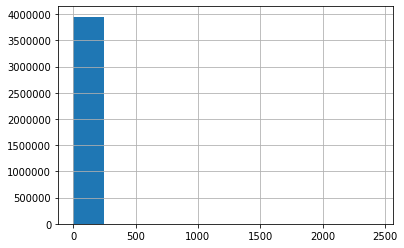

In [8]:
df.card_id.value_counts().hist()

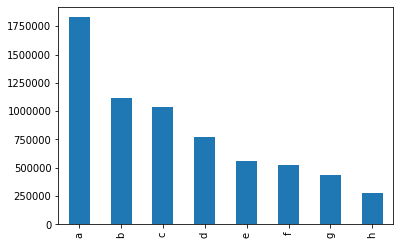

In [9]:
df.card_company.value_counts().plot.bar()

In [10]:
print(f"거래일 시작: {df.transacted_date.min()}")
print(f"거래일 끝: {df.transacted_date.max()}")

거래일 시작: 2016-06-01 00:00:00
거래일 끝: 2019-02-28 23:59:00


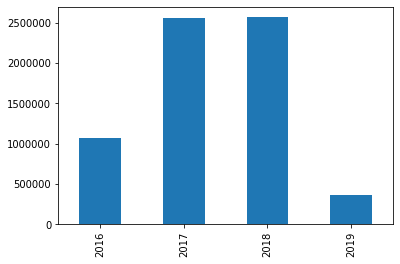

In [11]:
df.transacted_date.dt.year.value_counts().sort_index().plot.bar()

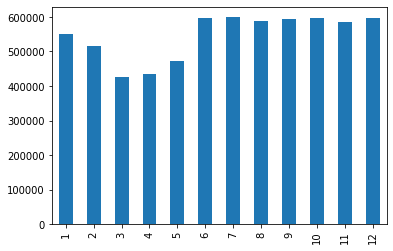

In [12]:
df.transacted_date.dt.month.value_counts().sort_index().plot.bar()

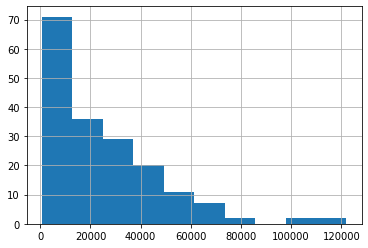

In [13]:
df.region.value_counts().hist()

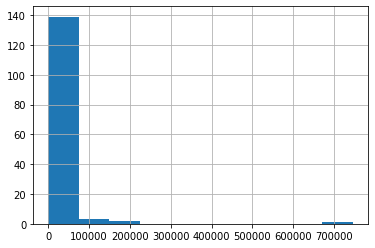

In [14]:
df.type_of_business.value_counts().hist()

In [15]:
df.type_of_business.value_counts()

한식 음식점업                     745905
두발 미용업                      178475
의복 소매업                      158234
기타 주점업                      102413
치킨 전문점                       89277
                             ...  
곡물 및 기타 식량작물 재배업               569
주방용품 및 가정용 유리, 요업 제품 소매업       551
배전반 및 전기 자동제어반 제조업             533
그 외 기타 생활용품 도매업                519
신선식품 및 단순 가공식품 도매업             231
Name: type_of_business, Length: 145, dtype: int64

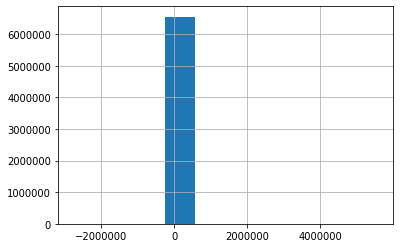

In [16]:
df.amount.hist()

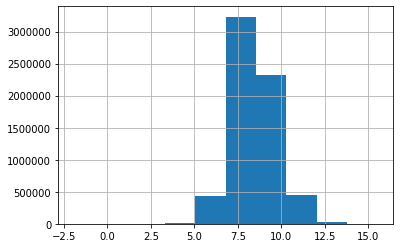

In [17]:
df.loc[df.amount>0, 'amount'].apply(np.log).hist()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


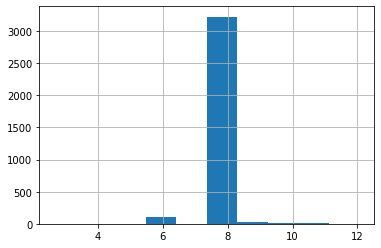

In [18]:
(-df.loc[df.amount-0, 'amount']).apply(np.log).hist()

In [26]:
# recent 3 months sell amount
recent_df = df[df.transacted_date >= datetime.datetime(2018, 9, 1)]

In [27]:
baseline_prediction = (recent_df.groupby('store_id').amount.sum() * (3/6)).reset_index(name='amount')

In [28]:
baseline_prediction

,store_id,amount
0,0,2.069786e+06
1,1,2.751786e+05
2,2,1.210786e+06
3,4,2.580286e+06
4,5,9.206571e+05
...,...,...
1958,2132,1.991000e+06
1959,2133,3.943357e+05
1960,2134,2.624643e+05
1961,2135,1.679071e+06


In [29]:
submit = pd.read_csv("../data09/submission.csv")
submit = submit[['store_id']].merge(baseline_prediction, on='store_id', how='left')
submit.amount = submit.amount.fillna(0)

In [30]:
submit.to_csv('../data09/baseline_submit.csv', index=False)